<a href="https://colab.research.google.com/github/skyMei-J/Naive-Bayes-Mushroom/blob/main/NaiveBayes-Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom Dataset

# input

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab  
import math
import random


training = pd.read_csv('agaricus-lepiota.data', sep=",", header=None)#


In [ ]:
feature_label =['edibility','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size', 'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring','veil-type', 'veil-color','ring-number','ring-type', 'spore-print-color','population','habitat']

df_training = pd.DataFrame(training)
df_training.columns=['edibility','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size', 'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring','veil-type', 'veil-color','ring-number','ring-type', 'spore-print-color','population','habitat']

num_of_sample= len (df_training.index)
num_of_feature = len(df_training.columns)

print ("initial # samples: ",num_of_sample,"samples")#n=8124 samples
print ("number of features: ",num_of_feature-1,"(edibility is now a class)")#d=22 features
print("class label",df_training['edibility'].unique())
print ()

for cha in df_training.columns:#d = 22 features
    print("{0:24}".format(cha),df_training[cha].unique()) 

initial # samples:  8124 samples
number of features:  22 (edibility is now a class)
class label ['p' 'e']

edibility                ['p' 'e']
cap-shape                ['x' 'b' 's' 'f' 'k' 'c']
cap-surface              ['s' 'y' 'f' 'g']
cap-color                ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises                  ['t' 'f']
odor                     ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment          ['f' 'a']
gill-spacing             ['c' 'w']
gill-size                ['n' 'b']
gill-color               ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape              ['e' 't']
stalk-root               ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring   ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring   ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type                ['p']
veil-color               ['w' 'n' 'o' 'y']
ring-number              ['o' 't' 'n']
ring-type   

# Visualization

D:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


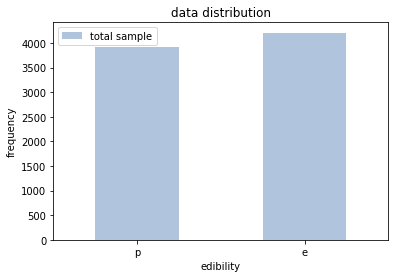

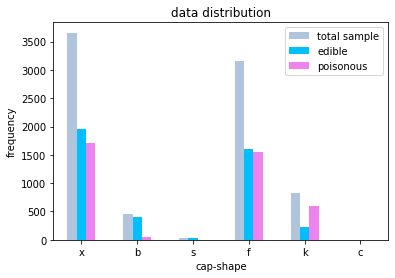

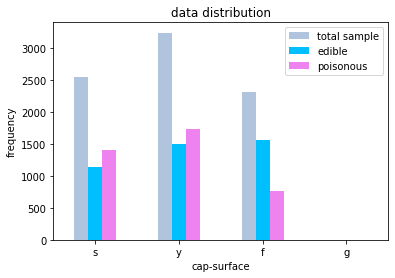

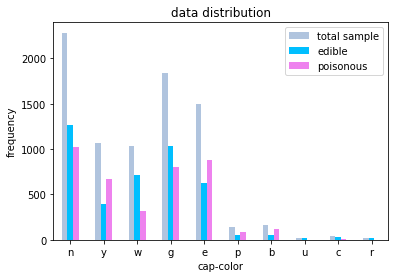

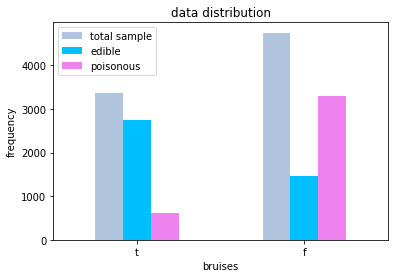

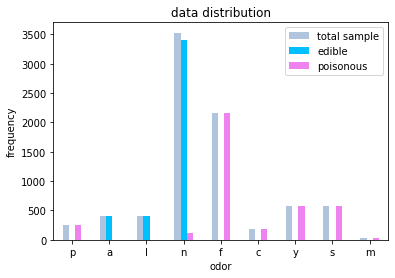

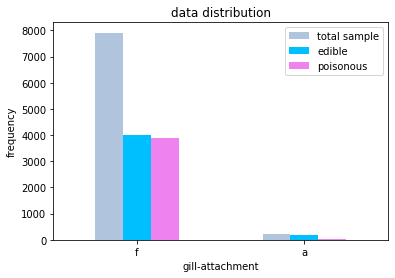

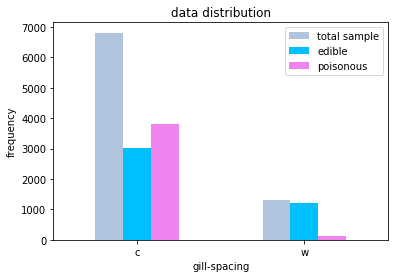

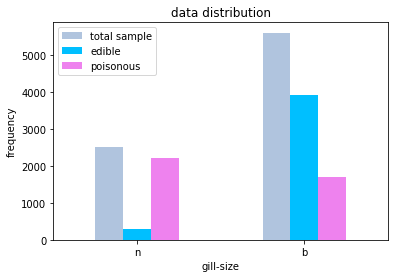

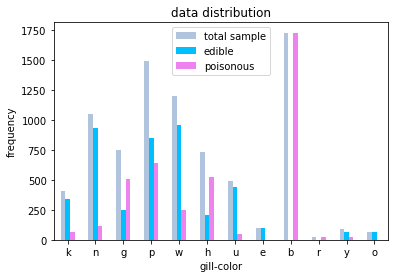

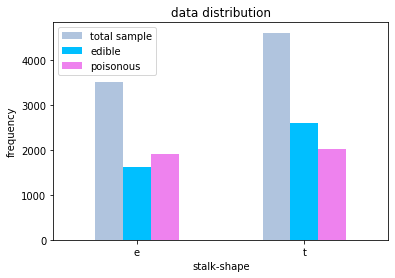

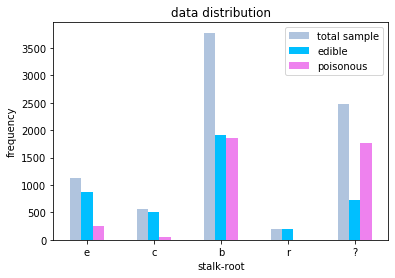

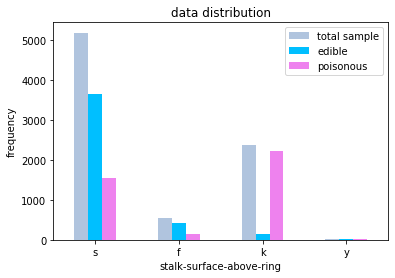

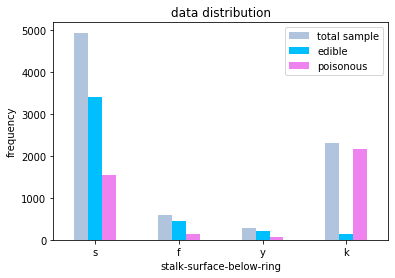

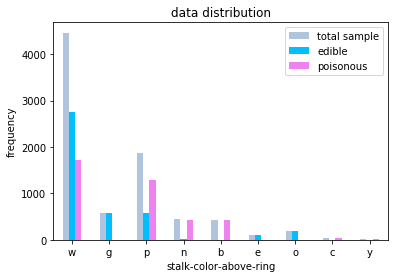

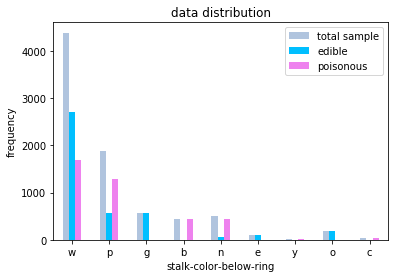

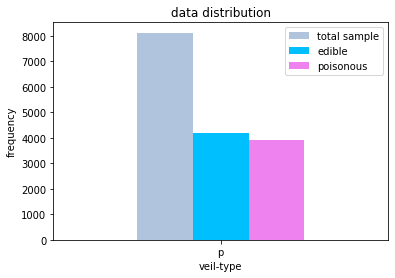

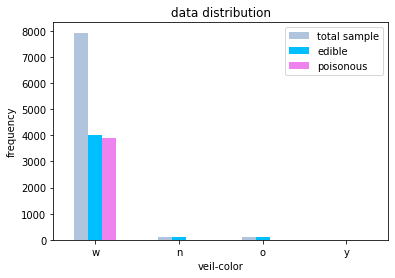

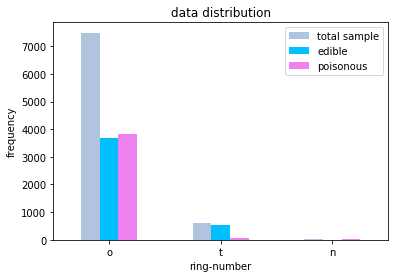

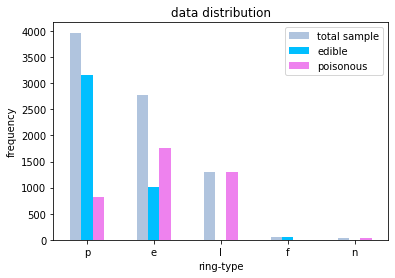

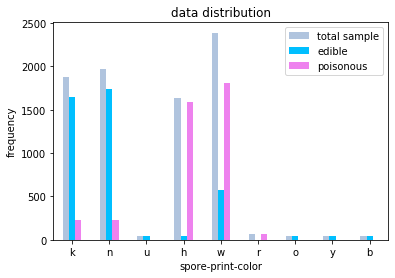

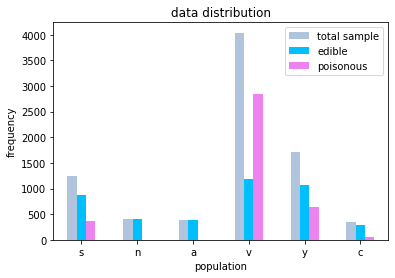

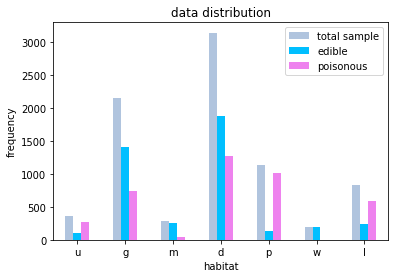

In [ ]:
feature_lab =['edibility','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size', 'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring','veil-type', 'veil-color','ring-number','ring-type', 'spore-print-color','population','habitat']
c_df = df_training[df_training.columns[0]]
f_df = df_training[df_training.columns[1:23]]
label_e = f_df[c_df=='e']
label_p = f_df[c_df=='p']

A = df_training[feature_lab[0]].value_counts()
index = df_training[feature_lab[0]].unique()

df = pd.DataFrame({'total sample':A}, index=index)
ax = df.plot.bar(rot=0,color = ['lightsteelblue'])
plt.title('data distribution')
plt.xlabel(feature_lab[0])
plt.ylabel('frequency')
# plt.savefig(feature_lab[0])

for i in range(1,23):     
    A = df_training[feature_lab[i]].value_counts()
    E = label_e[feature_lab[i]].value_counts()
    P = label_p[feature_lab[i]].value_counts()
    
    index = df_training[feature_lab[i]].unique()

    df = pd.DataFrame({'total sample':A,'edible': E,'poisonous': P}, index=index)
    ax = df.plot.bar(rot=0,color = ['lightsteelblue','deepskyblue','violet'])
    plt.title('data distribution')
    plt.xlabel(feature_lab[i])
    plt.ylabel('frequency')
# #     plt.savefig(feature_lab[i])


# Data preprocessing

#Drop

In [ ]:
df_drop = df_training.drop(['stalk-root', 'veil-type'],axis = 1)

print ("drop stalk-root")
print ("drop  veil-type")

print ("--------------------------after dropping---------------------------")
num_of_sample=len(df_drop.index)
num_of_feature = len(df_drop.columns)
print ("# samples: ",num_of_sample,"samples")#n=8124 samples
print ("number of features: ",num_of_feature-1,"(edibility is now a class)")#d=22 features
print("class label",df_drop['edibility'].unique())
print ()

for cha in df_drop.columns:#d = 22 features
    print("{0:24}".format(cha),df_drop[cha].unique()) 


drop stalk-root
drop  veil-type
--------------------------after dropping---------------------------
# samples:  8124 samples
number of features:  20 (edibility is now a class)
class label ['p' 'e']

edibility                ['p' 'e']
cap-shape                ['x' 'b' 's' 'f' 'k' 'c']
cap-surface              ['s' 'y' 'f' 'g']
cap-color                ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises                  ['t' 'f']
odor                     ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment          ['f' 'a']
gill-spacing             ['c' 'w']
gill-size                ['n' 'b']
gill-color               ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape              ['e' 't']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring   ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring   ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color               ['w' 'n' 'o' 'y']
ring-number              ['o' 't' 'n'

In [ ]:

feature = {}
i=0
#train[train.columns[1:-1]]
for cha in df_drop.columns[1:21]:
    feature[i] = df_drop[cha].unique()#20 features
    i=i+1

# shuffle

In [ ]:
# np.random.seed(75)
def shuffle(df_origin): 
    df = df_origin.sample(frac=1)#,random_state=113
    df2=df.reset_index(drop=True)
    return df2
df_shuffle = shuffle(df_drop)


# training testing split

# holdout

In [ ]:
#split
def Holdout(df):

    test_num = math.floor(len(df.index)*0.3)#2438(30% boundary)
    split = df.index < test_num#30% are True，70% are False
    test = df[split]   #take 30% data
    train  = df[~split]#take 70% data
    c_train = train[train.columns[0]].reset_index(drop = True)   #column of class label(edibility) of train data
    c_test  = test[test.columns[0]]      #test data: class label(edibility)'s column
    f_train = train[train.columns[1:21]].reset_index(drop = True) #column of train data except for class label(edibility)
    f_test  = test[test.columns[1:21]]   #column of test data except for class label(edibility)
    return f_train,f_test,c_train,c_test

f_train_Holdout , f_test_Holdout, c_train_Holdout , c_test_Holdout = Holdout( df_shuffle )


# print (f_train_Holdout)
# print ("number of training samples: {}".format(num_train_Holdout))
# print ("number of test samples: {}".format(num_test_Holdout))


# K-fold

In [ ]:
#split
def K_fold(df):
    test_num_1 = math.floor(len(df.index)*(float(1)/float(3)))#2708(1/3 boundary)
    test_num_2 = math.floor(len(df.index)*(float(2)/float(3)))#5416(2/3 boundary)
    #take the first 1/3 data for test
    split = df.index < test_num_1#split is a booling list，true for the first 1/3， False for the last 2/3
    test = df[split]
    train  = df[~split]
    c_train_1 = train[train.columns[0]]   # class label(edibility)'s column in train data
    c_test_1  = test[test.columns[0]]     # class label(edibility)'s column in test data
    f_train_1 = train[train.columns[1:21]]# columns in train data except for class label(edibility)
    f_test_1  = test[test.columns[1:21]]  # columns in test data except for class label(edibility)
    #take the middle 1/3 for test
    split = np.logical_and(df.index >= test_num_1 , df.index < test_num_2)
    test = df[split]
    train  = df[~split]
    tc_train_2 = train[train.columns[0]]
    tc_test_2  = test[test.columns[0]]
    tf_train_2 = train[train.columns[1:21]]
    tf_test_2  = test[test.columns[1:21]]
    #take the last 1/3 for test
    split = df.index >= test_num_2
    test = df[split]
    train  = df[~split]
    tc_train_3 = train[train.columns[0]]
    tc_test_3  = test[test.columns[0]]
    tf_train_3 = train[train.columns[1:21]]
    tf_test_3  = test[test.columns[1:21]]
    #After splitting data，the index of the last two 1/3 data is not counted from 0, so I reset index
    c_train_2 = tc_train_2.reset_index(drop=True)
    c_test_2  = tc_test_2.reset_index(drop=True)
    f_train_2 = tf_train_2.reset_index(drop=True)
    f_test_2  = tf_test_2.reset_index(drop=True)
    
    c_train_3 =tc_train_3.reset_index(drop=True)
    c_test_3  =tc_test_3.reset_index(drop=True)
    f_train_3 =tf_train_3.reset_index(drop=True)
    f_test_3  =tf_test_3.reset_index(drop=True)    
    return f_train_1,f_test_1,c_train_1,c_test_1, f_train_2,f_test_2,c_train_2,c_test_2, f_train_3,f_test_3,c_train_3,c_test_3

f_train_K1,f_test_K1,c_train_K1, c_test_K1,  f_train_K2 ,f_test_K2,c_train_K2,c_test_K2,  f_train_K3,f_test_K3,c_train_K3,c_test_K3= K_fold( df_shuffle )


# Model construction
# naive_bayes_train_without_Laplace

In [ ]:
#condition = np.logical_and(df_shuffle['edibility']=='e',df_shuffle['odor']=='n')
#df_shuffle[condition]
#df_shuffle['edibility']=='e'
def naive_bayes_train_without_Laplace(feature_train,class_train,featureDictionary):
    
    #########################edible################################
    i=0
    feature_train_e = feature_train[class_train=='e']#take edible data
    Edible = {}#to list
   
    for feature_name in feature_train_e.columns[0:20]:#iterate every feature
        
        nowf = feature_train_e[feature_name].unique()#attribute of each feature_name
        list_unique = nowf.tolist()
        counts = feature_train_e.groupby(feature_name).size()#how many times each attribute exist in the same feature
        prob_e = {}#P(Probability of each attribute exist|edible)
#         print(counts/len_e)
        temp = counts/len(feature_train_e)
        
        for tt in featureDictionary[i]:
            prob_e[tt]= 0.00001
        
        for tt in featureDictionary[i]:# tt: each attribute of feature_name               
            if  tt  in list_unique:
                prob_e[tt]=temp[tt]#P(# tt|# of edible in train)
        
        Edible[i]=prob_e#Put each attribute's P(Probability of each attribute exist|edible) of the feature_name into this dict
        #dict[feature]
        i=i+1 
    #########################poisonous################################
    i=0    
    feature_train_p = feature_train[class_train=='p']
    Poisonous = {}
    
    for feature_name in feature_train_e.columns[0:20]:
        
        nowf= feature_train_p[feature_name].unique()
        list_unique = nowf.tolist()
        counts = feature_train_p.groupby(feature_name).size()
        prob_p = {}
        temp = counts/len(feature_train_p)
        for rr in featureDictionary[i]:
            prob_p[rr]= 0.00001
            
        for rr in featureDictionary[i]:#
            if rr in list_unique:
                prob_p[rr]=temp[rr]#P(# rr|# of poisonous in train)
                
        Poisonous[i]=prob_p
        
        i=i+1 
    return Poisonous,Edible


# naive_bayes_train_Laplace_smoothing

In [ ]:
def naive_bayes_train_Laplace_smoothing(feature_train,class_train,featureDictionary):
    k=0.001
    #########################edible################################
    i=0
    feature_train_e = feature_train[class_train=='e']
    Edible = {}

    for feature_name in feature_train_e.columns[0:20]:
        temp_zero = ((0+k)/(len(feature_train_e)+k*len(featureDictionary[i])))
        nowf = feature_train_e[feature_name].unique()  
        list_unique = nowf.tolist()                   
        counts = feature_train_e.groupby(feature_name).size()
        temp = (counts+k) / (len(feature_train_e)+(k*len(featureDictionary[i])))
        prob_e = {}   
        for tt in featureDictionary[i]:
            prob_e[tt]= 0.00001
        
        for tt in featureDictionary[i]:
            if tt  in list_unique:          
                prob_e[tt]= (counts[tt]+k) / (len(feature_train_e)+(k*len(featureDictionary[i])))#P(# tt and edible|# of edible in train)

        Edible[i]=prob_e
        i=i+1
        
     #########################poisonous################################    
    i=0   
    feature_train_p = feature_train[class_train=='p']
    Poisonous = {}
    
    for feature_name in feature_train_e.columns[0:20]:
        p_zero = (0+k)/(len(feature_train_p)+k*len(featureDictionary[i]))
#         p_temp = (counts+k) / (len(feature_train_p)+(k*len(featureDictionary[i])))
        nowf = feature_train_p[feature_name].unique()
        list_unique = nowf.tolist()
        counts = feature_train_p.groupby(feature_name).size()
        prob_p = {}
        for rr in featureDictionary[i]:
            prob_p[rr]= 0.00001
        
        for rr in featureDictionary[i]:
            if rr in list_unique:
               
                prob_p[rr]=(counts[rr]+k) / (len(feature_train_p)+(k*len(featureDictionary[i])))
        Poisonous[i]=prob_p
        
        i=i+1 
    return Poisonous,Edible


In [ ]:
#Holdout validation         
pPo        ,pEd        = naive_bayes_train_without_Laplace  (f_train_Holdout , c_train_Holdout , feature)
pPo_Laplace,pEd_Laplace= naive_bayes_train_Laplace_smoothing(f_train_Holdout , c_train_Holdout , feature)

#K-fold validation
K1_pPo        ,K1_pEd        = naive_bayes_train_without_Laplace  (f_train_K1,c_train_K1 , feature)
K1_pPo_Laplace,K1_pEd_Laplace= naive_bayes_train_Laplace_smoothing(f_train_K1,c_train_K1 , feature)

K2_pPo        ,K2_pEd        = naive_bayes_train_without_Laplace  (f_train_K2,c_train_K2 , feature)
K2_pPo_Laplace,K2_pEd_Laplace= naive_bayes_train_Laplace_smoothing(f_train_K2,c_train_K2 , feature)

K3_pPo        ,K3_pEd        = naive_bayes_train_without_Laplace  (f_train_K3,c_train_K3 , feature)
K3_pPo_Laplace,K3_pEd_Laplace= naive_bayes_train_Laplace_smoothing(f_train_K3,c_train_K3 , feature)

# print(pPo)
# print(pPo[1]['y'])

# testing

In [ ]:

def test_naive_bayes(feature_test,class_test,Po,Ed):
    label =['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size', 'gill-color','stalk-shape','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color','ring-number','ring-type', 'spore-print-color','population','habitat']
    # Isolate the training set based on clasification label
    test_e = feature_test[class_test=='e']
    test_p = feature_test[class_test=='p']
    result = []
    for i in range(0,len(feature_test)): # # test samples  
        e=0
        p=0
        for j  in range(0,20):
            e =e + math.log(Ed[j][feature_test.loc[i, label[j]]])
            p =p + math.log(Po[j][feature_test.loc[i, label[j]]])
        e = e + math.log(float(len(test_e )/len(feature_test)))#P(edible/total)
        p = p + math.log(float(len(test_p )/len(feature_test)))#P(poisonous/total)
        if e>p:
            result.append('e')
        else:
            result.append('p')
    np.array(result)
    return result

#Holdout validation  

which_class_holdout_Laplace = test_naive_bayes(f_test_Holdout,c_test_Holdout,pPo_Laplace,pEd_Laplace)
which_class_holdout =         test_naive_bayes(f_test_Holdout,c_test_Holdout,pPo,pEd)

#K-fold validation
K1_which_class_Laplace = test_naive_bayes(f_test_K1,c_test_K1,K1_pPo_Laplace,K1_pEd_Laplace)
K1_which_class         = test_naive_bayes(f_test_K1,c_test_K1,K1_pPo        ,K1_pEd )

K2_which_class_Laplace = test_naive_bayes(f_test_K2,c_test_K2,K2_pPo_Laplace,K2_pEd_Laplace)
K2_which_class         = test_naive_bayes(f_test_K2,c_test_K2,K2_pPo        ,K2_pEd )

K3_which_class_Laplace = test_naive_bayes(f_test_K3,c_test_K3,K3_pPo_Laplace,K3_pEd_Laplace)
K3_which_class         = test_naive_bayes(f_test_K3,c_test_K3,K3_pPo        ,K3_pEd )

# result

In [ ]:


def predict(f_test,c_test,prediction):
    num_correct=0
    con = np.zeros((2,2), dtype=float)#Cn = 2 (edible,poisonous)
    for i in range(0,len(f_test)):

        if prediction[i] == c_test.loc[i]:
            num_correct +=1
            if(prediction[i]=='e'):
                con[0][0]+=1
                
            if(prediction[i]=='p'):
                con[1][1]+=1
              
        if prediction[i] != c_test.loc[i]:
            if(prediction[i]=='e'):
                con[0][1]+=1
             
            if(prediction[i]=='p'):
                con[0][1]+=1
                
    return (num_correct/len(f_test)),con


    


# Accuracy

In [ ]:
print('-------------------Accuracy-----------------------')
print('----------Holdout validation:-------------')
print()
print('with Laplace smoothing:')
a,con_H_L=predict(f_test_Holdout,c_test_Holdout,which_class_holdout_Laplace)
print('Accuracy:',a)
print()
print("without Laplace smoothing:")
b, con_H=predict(f_test_Holdout,c_test_Holdout,which_class_holdout)
print('Accuracy:',b)
print()
print()
print('----------------K-fold validation with K=3:--------------')

print('with Laplace smoothing:')
k1L, con_k1_L= predict(f_test_K1,c_test_K1,K1_which_class_Laplace)
k2L, con_k2_L= predict(f_test_K2,c_test_K2,K2_which_class_Laplace)
k3L, con_k3_L= predict(f_test_K3,c_test_K3,K3_which_class_Laplace)

print('average Accuracy',(k1L+k2L+k3L)/3)
print()
print("without Laplace smoothing:")
k1, con_k1=predict(f_test_K1,c_test_K1,K1_which_class)
k2, con_k2=predict(f_test_K2,c_test_K2,K2_which_class)
k3, con_k3=predict(f_test_K3,c_test_K3,K3_which_class)

print('average Accuracy',(k1+k2+k3)/3)

-------------------Accuracy-----------------------
----------Holdout validation:-------------

with Laplace smoothing:
Accuracy: 0.9905621665982766

without Laplace smoothing:
Accuracy: 0.9905621665982766


----------------K-fold validation with K=3:--------------
with Laplace smoothing:
average Accuracy 0.9890448055145248

without Laplace smoothing:
average Accuracy 0.9890448055145248


# confusion matrix

In [ ]:
print('-------------------confusion matrix-----------------------')
print('----------Holdout validation:-------------')
print("without Laplace smoothing:")
print(con_H)
print()
print('with Laplace smoothing:')
print(con_H_L)
print('----------K-fold validation with K=3:--------------')

print("without Laplace smoothing:")
print(con_k1)
print(con_k2)
print(con_k3)
print()
print('with Laplace smoothing:')
print(con_k1_L)
print(con_k2_L)
print(con_k3_L)




-------------------confusion matrix-----------------------
----------Holdout validation:-------------
without Laplace smoothing:
[[1230.   23.]
 [   0. 1184.]]

with Laplace smoothing:
[[1230.   23.]
 [   0. 1184.]]
----------K-fold validation with K=3:--------------
without Laplace smoothing:
[[1369.   30.]
 [   0. 1309.]]
[[1381.   25.]
 [   0. 1302.]]
[[1434.   34.]
 [   0. 1240.]]

with Laplace smoothing:
[[1369.   30.]
 [   0. 1309.]]
[[1381.   25.]
 [   0. 1302.]]
[[1434.   34.]
 [   0. 1240.]]


# precision

In [ ]:

def Precision(con):
    return con[0][0]/(con[0][0]+con[1][0])

print('-------------------precision-----------------------')
print('----------Holdout validation:-------------')
print("without Laplace smoothing:",Precision(con_H))
print()
print()
print('with Laplace smoothing:   ',Precision(con_H_L))
print()
print('----------K-fold validation with K=3:--------------')
print("without Laplace smoothing:",(Precision(con_k1)+Precision(con_k2)+Precision(con_k3)) /3)
print()
print()
print('with Laplace smoothing:   ',(Precision(con_k1_L)+Precision(con_k2_L)+Precision(con_k3_L)) /3)
print()


-------------------precision-----------------------
----------Holdout validation:-------------
without Laplace smoothing: 1.0


with Laplace smoothing:    1.0

----------K-fold validation with K=3:--------------
without Laplace smoothing: 1.0


with Laplace smoothing:    1.0



# sensitivity

In [ ]:
def Sensitivity(con):
    return con[0][0]/(con[0][0]+con[0][1])

print('-------------------Sensitivity-----------------------')
print('----------Holdout validation:-------------')
print("without Laplace smoothing:",Sensitivity(con_H))
print()
print()
print('with Laplace smoothing:   ',Sensitivity(con_H_L))
print()
print('----------K-fold validation with K=3:--------------')
print("without Laplace smoothing:",(Sensitivity(con_k1)+Sensitivity(con_k2)+Sensitivity(con_k3)) /3)
print()
print()
print('with Laplace smoothing:   ',(Sensitivity(con_k1_L)+Sensitivity(con_k2_L)+Sensitivity(con_k3_L)) /3)
print()


-------------------Sensitivity-----------------------
----------Holdout validation:-------------
without Laplace smoothing: 0.9816440542697525


with Laplace smoothing:    0.9816440542697525

----------K-fold validation with K=3:--------------
without Laplace smoothing: 0.9792048032439569


with Laplace smoothing:    0.9792048032439569



# Iris Dataset

#input

In [ ]:
iris = pd.read_csv('iris.data', sep=",", header=None)#
iris_nor =pd.read_csv('iris.data', sep=",", header=None)#
# print(iris)
iris.columns=['sepal_length','sepal_width','petal_length','petal_width','species']
iris_nor.columns=['sepal_length','sepal_width','petal_length','petal_width','species']
iris_ff = ['sepal_length','sepal_width','petal_length','petal_width','species']
# 'Iris-setosa','Iris-versicolor','Iris-virginica'
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#spicies:'Iris-setosa'

In [ ]:
column_species = iris[iris.columns[4]]
column_other = iris[iris.columns[0:4]]

seto = column_other[column_species=='Iris-setosa']
vers = column_other[column_species=='Iris-versicolor']
virg = column_other[column_species=='Iris-virginica']

seto.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


#spicies:'Iris-versicolor'

In [ ]:
vers.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


#species'Iris-virginica'

In [ ]:
virg.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


# Visualization

# 'Frequency Distribution of feature by Species

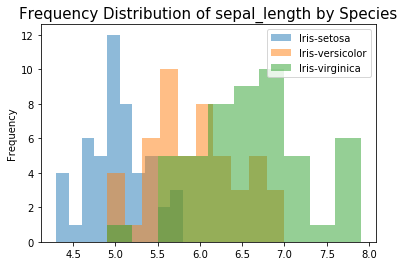

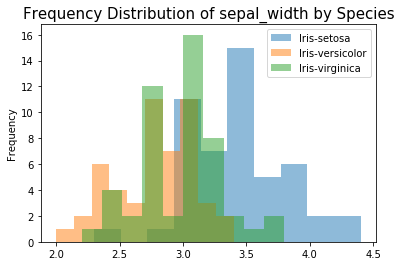

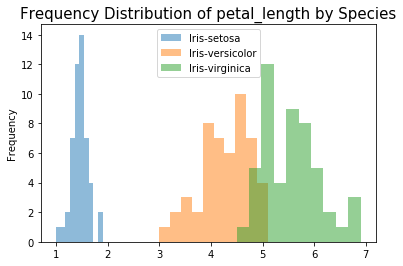

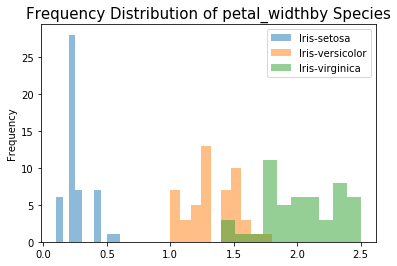

In [ ]:
iris.groupby("species").sepal_length.plot(kind='hist',alpha=0.5,legend=True)
plt.title('Frequency Distribution of sepal_length by Species',fontsize=15)
# plt.savefig('Frequency Distribution of sepal_length by Species')
plt.show()


iris.groupby("species").sepal_width.plot(kind='hist',alpha=0.5,legend=True)
plt.title('Frequency Distribution of sepal_width by Species',fontsize=15)
# plt.savefig('Frequency Distribution of sepal_width by Species')
plt.show()


iris.groupby("species").petal_length.plot(kind='hist',alpha=0.5,legend=True)
plt.title('Frequency Distribution of petal_length by Species',fontsize=15)
# plt.savefig('Frequency Distribution of petal_length by Species')
plt.show()


iris.groupby("species").petal_width.plot(kind='hist',alpha=0.5,legend=True)
plt.title('Frequency Distribution of petal_widthby Species',fontsize=15)
# plt.savefig('Frequency Distribution of petal_width by Species')
plt.show()


# feature Frequency Distribution of total sample

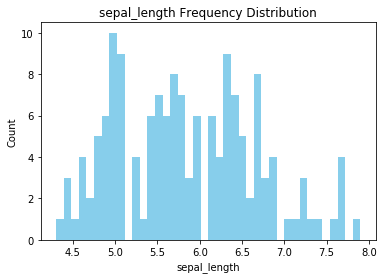

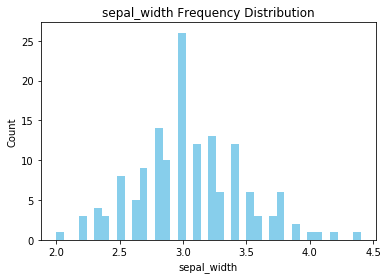

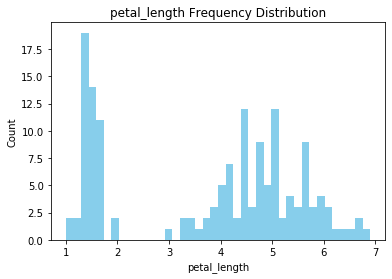

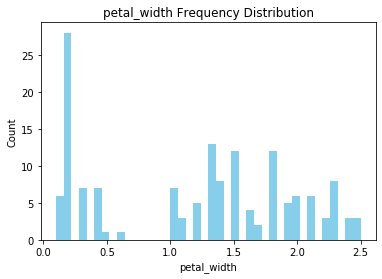

In [ ]:
iris_ff = ['sepal_length','sepal_width','petal_length','petal_width']
for f in iris_ff:
#     plt.figure() 
    plt.hist(iris[f] , bins = 40, color = "skyblue") 
    plt.title(f+' Frequency Distribution') 
    plt.xlabel(f) 
    plt.ylabel("Count") 
#     plt.savefig(f+' Frequency Distribution')
    plt.show()


# scatter plot

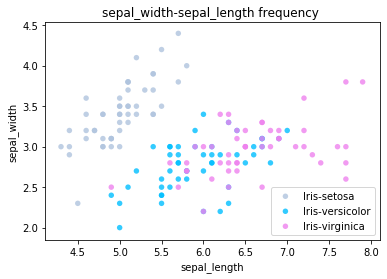

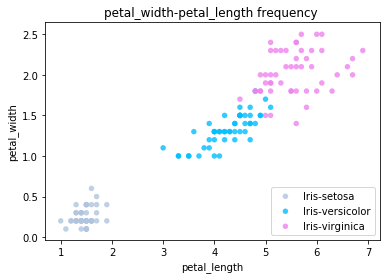

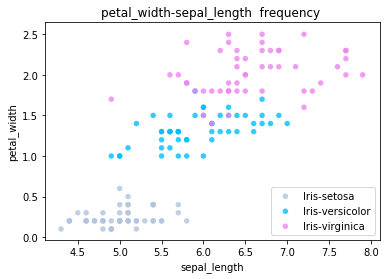

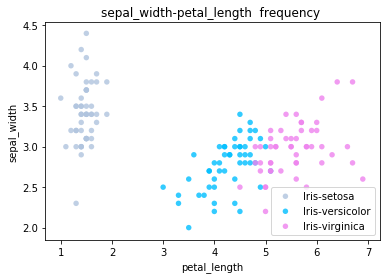

In [ ]:
g1 = (seto['sepal_length'],seto['sepal_width'])
g2 = (vers['sepal_length'],vers['sepal_width'])
g3 = (virg['sepal_length'],virg['sepal_width'])

data = (g1, g2, g3)
colors = ('lightsteelblue','deepskyblue','violet')
groups = ('Iris-setosa','Iris-versicolor','Iris-virginica')

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('sepal_width-sepal_length frequency ')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc=4)
# plt.savefig('sepal_width-sepal_length frequency ')
plt.show()

g1 = (seto['petal_length'],seto['petal_width'])
g2 = (vers['petal_length'],vers['petal_width'])
g3 = (virg['petal_length'],virg['petal_width'])

data = (g1, g2, g3)
colors = ('lightsteelblue','deepskyblue','violet')
groups = ('Iris-setosa','Iris-versicolor','Iris-virginica')

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_width-petal_length frequency ')
plt.legend(loc=4)
# plt.savefig('petal_width-petal_length frequency ')
plt.show()


g1 = (seto['sepal_length'],seto['petal_width'])
g2 = (vers['sepal_length'],vers['petal_width'])
g3 = (virg['sepal_length'],virg['petal_width'])

data = (g1, g2, g3)
colors = ('lightsteelblue','deepskyblue','violet')
groups = ('Iris-setosa','Iris-versicolor','Iris-virginica')

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('petal_width-sepal_length  frequency ')
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.legend(loc=4)
# plt.savefig('petal_width-sepal_length  frequency ')
plt.show()

g1 = (seto['petal_length'],seto['sepal_width'])
g2 = (vers['petal_length'],vers['sepal_width'])
g3 = (virg['petal_length'],virg['sepal_width'])

data = (g1, g2, g3)
colors = ('lightsteelblue','deepskyblue','violet')
groups = ('Iris-setosa','Iris-versicolor','Iris-virginica')

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('sepal_width-petal_length  frequency ')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.legend(loc=4)
# plt.savefig('sepal_width-petal_length  frequency ')
plt.show()



# mean

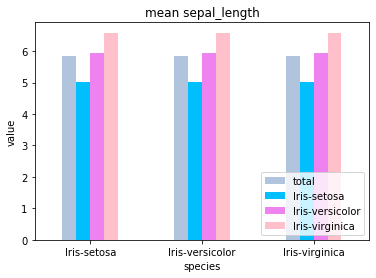

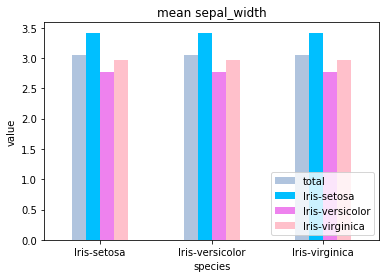

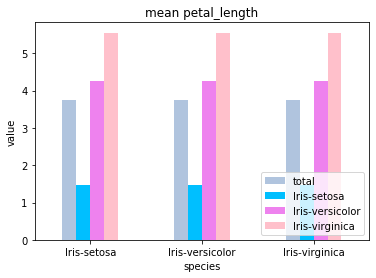

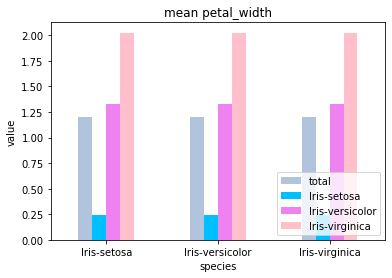

In [ ]:
f = ['sepal_length','sepal_width','petal_length','petal_width','species']
sp = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(0,4): #four feature
    T = iris[f[i]].mean()
    A = seto[f[i]].mean()
    E = vers[f[i]].mean()
    P = virg[f[i]].mean()
    index = iris['species'].unique()
    df = pd.DataFrame({'total': T,'Iris-setosa':A,'Iris-versicolor': E,'Iris-virginica': P}, index=index)
    ax = df.plot.bar(rot=0,color = ['lightsteelblue','deepskyblue','violet','pink'])
    plt.title('mean '+f[i])
    plt.xlabel('species')
    plt.ylabel('value')
#     plt.savefig("mean "+f[i])
    plt.legend(loc=4)


# standard deviation 

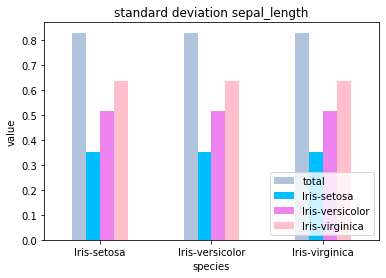

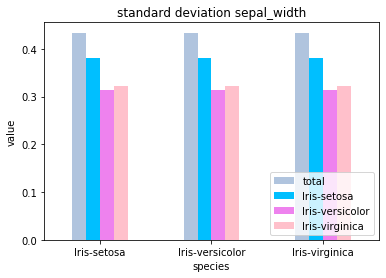

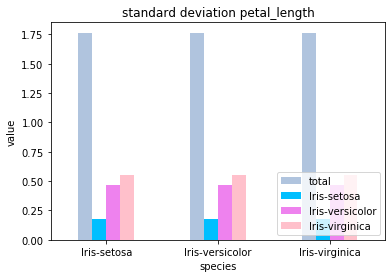

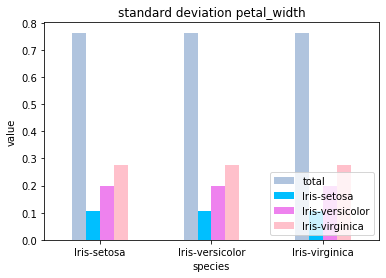

In [ ]:
f = ['sepal_length','sepal_width','petal_length','petal_width','species']
sp = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(0,4): #four feature
    T = iris[f[i]].std()
    A = seto[f[i]].std()
    E = vers[f[i]].std()
    P = virg[f[i]].std()

    index = iris['species'].unique()

    df = pd.DataFrame({'total': T,'Iris-setosa':A,'Iris-versicolor': E,'Iris-virginica': P}, index=index)
    ax = df.plot.bar(rot=0,color = ['lightsteelblue','deepskyblue','violet','pink'])
    plt.title('standard deviation '+f[i])
    plt.xlabel('species')
    plt.ylabel('value')
#     plt.savefig('standard deviation '+f[i])
    plt.legend(loc=4)

# preprocessing
# normalize data

In [ ]:
print(iris)

# print(iris_nor)
f = ['sepal_length','sepal_width','petal_length','petal_width']

def normalize_iris(nn):
    for ch in f:
        scale = nn[ch].max() - nn[ch].min()
        nn[ch] = (nn[ch] - nn[ch].min()) / scale

        
    return(nn)
    
bonus = normalize_iris(iris_nor)
print(bonus)
# print(iris_nor)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
     sepal_length  sepal_width  petal_length  petal_width         species
0        0.222

# shuffle

In [ ]:
iris_shuffle = shuffle(iris)
iris_shuffle_normal = shuffle(iris)

# training and testing split

# K-fold

In [ ]:
def iris_K_fold(df):
    test_num_1 = math.floor(len(df.index)*(float(1)/float(3)))#2708(1/3)
    test_num_2 = math.floor(len(df.index)*(float(2)/float(3)))#5416(2/3)
    
    split = df.index < test_num_1
    test = df[split]
    train  = df[~split]
    c_train_1 = train[train.columns[4]]   
    c_test_1  = test[test.columns[4]]     
    f_train_1 = train[train.columns[0:4]]
    f_test_1  = test[test.columns[0:4]] 
    
    split = np.logical_and(df.index >= test_num_1 , df.index < test_num_2)
    test = df[split]
    train  = df[~split]
    tc_train_2 = train[train.columns[4]]
    tc_test_2  = test[test.columns[4]]
    tf_train_2 = train[train.columns[0:4]]
    tf_test_2  = test[test.columns[0:4]]
    
    split = df.index >= test_num_2
    test = df[split]
    train  = df[~split]
    tc_train_3 = train[train.columns[4]]
    tc_test_3  = test[test.columns[4]]
    tf_train_3 = train[train.columns[0:4]]
    tf_test_3  = test[test.columns[0:4]]
    
    c_train_2 = tc_train_2.reset_index(drop=True)
    c_test_2  = tc_test_2.reset_index(drop=True)
    f_train_2 = tf_train_2.reset_index(drop=True)
    f_test_2  = tf_test_2.reset_index(drop=True)
    
    c_train_3 =tc_train_3.reset_index(drop=True)
    c_test_3  =tc_test_3.reset_index(drop=True)
    f_train_3 =tf_train_3.reset_index(drop=True)
    f_test_3  =tf_test_3.reset_index(drop=True)    
    return f_train_1,f_test_1,c_train_1,c_test_1, f_train_2,f_test_2,c_train_2,c_test_2, f_train_3,f_test_3,c_train_3,c_test_3


iris_f_train_K1,iris_f_test_K1,iris_c_train_K1, iris_c_test_K1,  iris_f_train_K2 ,iris_f_test_K2,iris_c_train_K2,iris_c_test_K2,  iris_f_train_K3,iris_f_test_K3,iris_c_train_K3,iris_c_test_K3= iris_K_fold( iris_shuffle)

iris_f_train_K1_normal,iris_f_test_K1_normal,iris_c_train_K1_normal, iris_c_test_K1_normal,  iris_f_train_K2_normal ,iris_f_test_K2_normal,iris_c_train_K2_normal,iris_c_test_K2_normal,  iris_f_train_K3_normal,iris_f_test_K3_normal,iris_c_train_K3_normal,iris_c_test_K3_normal= iris_K_fold( iris_shuffle_normal)

# Holdout

In [ ]:
#split
def Iris_Holdout(df):

    test_num = math.floor(len(df.index)*0.3)#2438(30%)
    split = df.index < test_num
    test = df[split]   
    train  = df[~split]
    c_train = (train[train.columns[4]]).reset_index(drop = True)   
    c_test  = test[test.columns[4]]      
    f_train = train[train.columns[0:4]].reset_index(drop = True) 
    f_test  = test[test.columns[0:4]]   
    
    return f_train,f_test,c_train,c_test


iris_f_train_Holdout ,iris_f_test_Holdout ,iris_c_train_Holdout,iris_c_test_Holdout =  Iris_Holdout(iris_shuffle )
iris_f_train_Holdout_normal ,iris_f_test_Holdout_normal ,iris_c_train_Holdout_normal,iris_c_test_Holdout_normal =  Iris_Holdout(iris_shuffle_normal )
# print(iris_c_train_Holdout)

# Model construction
Gassian distrubution computing

In [ ]:
def Gassian_prob(x,uu,std):
    aa = (x-uu)*(x-uu)
    Aa = (2*(std*std))
    bb = -(aa/Aa)
    cc = math.exp(bb)
#     print(cc)
#     print(math.exp(bb))
    dd = math.sqrt(std*std*math.pi*2)
    ee = 1/dd
    ff =  ee*cc
    return(ff)
Gassian_prob(759.07 ,984.26, 460.94)

0.0007681353555393071

# training

In [ ]:
def NB_Gassian_train(fea,s):
    f = ['sepal_length','sepal_width','petal_length','petal_width']
    sp = ['Iris-setosa','Iris-versicolor','Iris-virginica']

    seto = fea[s=='Iris-setosa']
    vers = fea[s=='Iris-versicolor']
    virg = fea[s=='Iris-virginica']     

    mean_ar = np.zeros((4,3), dtype=float)
    std_ar = np.zeros((4,3), dtype=float)
    for i in range(0,4): #four feature
#         print(seto[f[i]])
        seto_mean = seto[f[i]].mean()#mean of each feature
        vers_mean = vers[f[i]].mean()
        virg_mean = virg[f[i]].mean()
        seto_std = seto[f[i]].std()
        vers_std = vers[f[i]].std()#std of each feature
        virg_std = virg[f[i]].std()
        
        mean_ar[i] = [seto_mean,vers_mean,virg_mean]#mean of each species
        std_ar[i]  = [seto_std,vers_std,virg_std] 
        
    return(mean_ar, std_ar)
    
iris_mean_Holdout, iris_std_Holdout =NB_Gassian_train(iris_f_train_Holdout ,iris_c_train_Holdout)
iris_mean_Holdout_normal, iris_std_Holdout_normal=NB_Gassian_train(iris_f_train_Holdout_normal ,iris_c_train_Holdout_normal)

# # print(iris_mean_Holdout)
iris_mean_Kfold,   iris_std_Kfold   =NB_Gassian_train(iris_f_train_K1,iris_c_train_K1)
iris_mean_Kfold,   iris_std_Kfold   =NB_Gassian_train(iris_f_train_K2,iris_c_train_K2)
iris_mean_Kfold,   iris_std_Kfold   =NB_Gassian_train(iris_f_train_K3,iris_c_train_K3)

iris_mean_Kfold_normal,   iris_std_Kfold_normal   =NB_Gassian_train(iris_f_train_K1_normal,iris_c_train_K1_normal)
iris_mean_Kfold_normal,   iris_std_Kfold_normal   =NB_Gassian_train(iris_f_train_K2_normal,iris_c_train_K2_normal)
iris_mean_Kfold_normal,   iris_std_Kfold_normal   =NB_Gassian_train(iris_f_train_K3_normal,iris_c_train_K3_normal)

# testing

In [ ]:
def test_iris(fea,s,mean_test,std_test):
    
    sp = ['Iris-setosa','Iris-versicolor','Iris-virginica']

    seto = fea[s=='Iris-setosa']
    vers = fea[s=='Iris-versicolor']
    virg = fea[s=='Iris-virginica']        
    result = []          
    fea_list = ['sepal_length','sepal_width','petal_length','petal_width']  
    for i in range(0,len(fea['sepal_length'])):
        j=0
        if float(len(seto['sepal_length']/len(fea['sepal_length'])))!=0 and float(len(vers['sepal_length']/len(fea['sepal_length'])))!=0 and float(len(virg['sepal_length']/len(fea['sepal_length'])))!=0:
            p_seto =math.log(float(len(seto['sepal_length']/len(fea['sepal_length']))))#P('Iris-setosa')
            p_vers =math.log(float(len(vers['sepal_length']/len(fea['sepal_length']))))#P('Iris-versicolor)
            p_virg =math.log(float(len(virg['sepal_length']/len(fea['sepal_length']))))#P('Iris-virginica')   
        else:
            p_seto =0.0000000001
            p_vers =0.0000000001
            p_virg =0.0000000001           
        for cha  in fea_list :
            p_seto = p_seto + math.log(Gassian_prob(fea[cha][i],mean_test[j][0],std_test[j][0]))#PDF
            p_vers = p_vers + math.log(Gassian_prob(fea[cha][i],mean_test[j][1],std_test[j][1]))#PDF
            p_virg = p_virg + math.log(Gassian_prob(fea[cha][i],mean_test[j][2],std_test[j][2]))#PDF 
            j=j+1
            
       
        if  p_seto>p_vers and p_seto>p_virg:
            result.append('Iris-setosa')
        elif p_vers>p_seto and p_vers>p_virg:
            result.append('Iris-versicolor')
        else:
            result.append('Iris-virginica')
#     print(result)
    np.array(result)
    return result
# print(iris_std_Holdout)
iris_test_ans_Holdout = test_iris(iris_f_test_Holdout,iris_c_test_Holdout, iris_mean_Holdout, iris_std_Holdout)
iris_test_ans_Holdout_normal = test_iris(iris_f_test_Holdout_normal,iris_c_test_Holdout_normal, iris_mean_Holdout_normal, iris_std_Holdout_normal)

iris_test_ans_K1      = test_iris(iris_f_test_K1,iris_c_test_K1,iris_mean_Kfold,   iris_std_Kfold )
iris_test_ans_K2      = test_iris(iris_f_test_K2,iris_c_test_K2,iris_mean_Kfold,   iris_std_Kfold )
iris_test_ans_K3      = test_iris(iris_f_test_K3,iris_c_test_K3,iris_mean_Kfold,   iris_std_Kfold )

iris_test_ans_K1_normal      = test_iris(iris_f_test_K1_normal,iris_c_test_K1_normal,iris_mean_Kfold_normal,   iris_std_Kfold_normal )
iris_test_ans_K2_normal      = test_iris(iris_f_test_K2_normal,iris_c_test_K2_normal,iris_mean_Kfold_normal,   iris_std_Kfold_normal )
iris_test_ans_K3_normal      = test_iris(iris_f_test_K3_normal,iris_c_test_K3_normal,iris_mean_Kfold_normal,   iris_std_Kfold_normal )

# Result:

# confusion matrix

In [ ]:
def iris_confusion_matrix(true, pred):
    result = np.zeros((3, 3))
    dict_f = {}
    dict_f = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}         
    for i in range(len(true)):
        result[  dict_f[true[i]  ]][  dict_f[pred[i]  ]]+=1
    print(result)
    return result 

In [ ]:
print('----------Holdout validation:-------------')
iris_con_Houdout = iris_confusion_matrix(np.array(iris_test_ans_Holdout ),np.array(iris_c_test_Holdout))
print('----------normal----------------')
iris_con_Houdout_normal = iris_confusion_matrix(np.array(iris_test_ans_Holdout_normal ),np.array(iris_c_test_Holdout_normal))

print('----------K-fold validation with K=3:--------------')
iris_con_K1 = iris_confusion_matrix(np.array(iris_test_ans_K1),np.array(iris_c_test_K1))
iris_con_K2 = iris_confusion_matrix(np.array(iris_test_ans_K2),np.array(iris_c_test_K2))
iris_con_K3 = iris_confusion_matrix(np.array(iris_test_ans_K3),np.array(iris_c_test_K3))
print('----------normal----------------')
iris_con_K1_normal = iris_confusion_matrix(np.array(iris_test_ans_K1_normal),np.array(iris_c_test_K1_normal))
iris_con_K2_normal = iris_confusion_matrix(np.array(iris_test_ans_K2_normal),np.array(iris_c_test_K2_normal))
iris_con_K3_normal = iris_confusion_matrix(np.array(iris_test_ans_K3_normal),np.array(iris_c_test_K3_normal))




----------Holdout validation:-------------
[[12.  0.  0.]
 [ 0. 18.  1.]
 [ 0.  0. 14.]]
----------normal----------------
[[ 9.  0.  0.]
 [ 0. 13.  1.]
 [ 0.  2. 20.]]
----------K-fold validation with K=3:--------------
[[13.  0.  0.]
 [ 0. 18.  1.]
 [ 0.  2. 16.]]
[[15.  0.  0.]
 [ 0. 12.  2.]
 [ 0.  2. 19.]]
[[22.  0.  0.]
 [ 0. 16.  0.]
 [ 0.  0. 12.]]
----------normal----------------
[[ 9.  0.  0.]
 [ 0. 13.  1.]
 [ 0.  3. 24.]]
[[22.  0.  0.]
 [ 0. 15.  2.]
 [ 0.  0. 11.]]
[[19.  0.  0.]
 [ 0. 19.  0.]
 [ 0.  0. 12.]]


# Accuracy,Precision,Recall

In [ ]:
def precision_iris(con):
    total = con.sum()
    Accuracy = (con[0][0]+con[1][1]+con[2][2])/total
    precision =con[0][0]/(con[0][0]+con[0][1]+con[0][2])
    recall =   con[0][0]/(con[0][0]+con[1][0]+con[2][0])
#     print('Accuracy : ',Accuracy)
#     print('precision:',precision)
#     print('recall:  ',recall)
    return(Accuracy,precision,recall)

print('----------Holdout validation:-------------')
ACC,PRE,REC = precision_iris(iris_con_Houdout)
print('----------without normal----------------')
print('Accuracy : ',ACC)
print('precision:',PRE)
print('recall:  ',REC)
print('----------normal----------------')
ACC,PRE,REC = precision_iris(iris_con_Houdout_normal)
print('Accuracy : ',ACC)
print('precision:',PRE)
print('recall:  ',REC)

print('----------K-fold validation with K=3:--------------')
print('----------without normal----------------')
ACC1,PRE1,REC1 = precision_iris(iris_con_K1)
ACC2,PRE2,REC2 = precision_iris(iris_con_K2)
ACC3,PRE3,REC3 = precision_iris(iris_con_K3)

print('Accuracy : ',(ACC1+ACC2+ACC3)/3)
print('precision:' ,(PRE1+PRE2+PRE3)/3)
print('recall:    ',(REC1+REC2+REC3)/3)

print('----------normal----------------')
ACC1,PRE1,REC1 = precision_iris(iris_con_K1_normal)
ACC2,PRE2,REC2 = precision_iris(iris_con_K2_normal)
ACC3,PRE3,REC3 = precision_iris(iris_con_K3_normal)


print('Accuracy : ',(ACC1+ACC2+ACC3)/3)
print('precision:' ,(PRE1+PRE2+PRE3)/3)
print('recall:    ',(REC1+REC2+REC3)/3)



----------Holdout validation:-------------
----------without normal----------------
Accuracy :  0.9777777777777777
precision: 1.0
recall:   1.0
----------normal----------------
Accuracy :  0.9333333333333333
precision: 1.0
recall:   1.0
----------K-fold validation with K=3:--------------
----------without normal----------------
Accuracy :  0.9533333333333333
precision: 1.0
recall:     1.0
----------normal----------------
Accuracy :  0.96
precision: 1.0
recall:     1.0
